In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import re

def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    float regex comes from https://stackoverflow.com/a/12643073/190597
    '''
    return [ atof(c) for c in re.split(r'[+-]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)', text) ]


In [2]:
all_files = glob.glob("data/*.csv")
all_files.sort(key=natural_keys)


li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,sep=";")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame[["NumberOfThreads", "NumberOfIterations","RunTime","HowFair"]] = frame[["NumberOfThreads", "NumberOfIterations","RunTime","HowFair"]].astype(float)


In [3]:
df_MSC_lock = frame[(frame['NameOfLock'] == 'MCS_lock')]
df_TTAS_lock = frame[(frame['NameOfLock'] == 'TTAS_lock')]
df_TAS_lock = frame[(frame['NameOfLock'] == 'TAS_lock')]
df_Array_lock = frame[(frame['NameOfLock'] == 'Array_lock')]
df_Ticket_lock = frame[(frame['NameOfLock'] == 'Ticket_lock')]
df_CLH_lock = frame[(frame['NameOfLock'] == 'CLH_lock')]
df_Array_lock_padded = frame[(frame['NameOfLock'] == 'Array_lock_padded')]
#df_Array_lock_optimized = frame[(frame['NameOfLock'] == 'Array_lock_optimized')]
df_Native_lock = frame[(frame['NameOfLock'] == 'Native_lock')]
df_omp_critical = frame[(frame['NameOfLock'] == 'omp_critical')]
df_TAS_lock

,NameOfLock,NumberOfIterations,NumberOfThreads,RunTime,HowFair,Timevar,HowOftenWhile
300,TAS_lock,5000.0,1.0,0.14,0.000,0.006940,0
301,TAS_lock,5000.0,2.0,1.12,1622.560,0.006499,5
302,TAS_lock,5000.0,3.0,1.08,2293.800,0.005426,3
303,TAS_lock,5000.0,4.0,2.60,1957.910,0.022271,6
304,TAS_lock,5000.0,5.0,4.32,1700.910,0.009330,10
305,TAS_lock,5000.0,6.0,4.62,1267.300,0.013200,8
306,TAS_lock,5000.0,7.0,6.24,1062.300,0.048259,9
307,TAS_lock,5000.0,8.0,6.82,1003.910,0.030117,9
308,TAS_lock,5000.0,9.0,7.36,1053.310,0.032683,9
309,TAS_lock,5000.0,10.0,7.12,969.581,0.044477,8


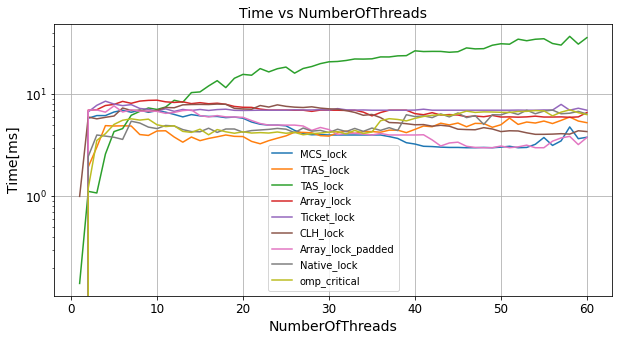

In [22]:
f = 14
plt.semilogy(df_MSC_lock.NumberOfThreads,df_MSC_lock.RunTime,label = "MCS_lock")
plt.semilogy(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,label = "TTAS_lock")
plt.semilogy(df_TAS_lock.NumberOfThreads,df_TAS_lock.RunTime,label = "TAS_lock")
plt.semilogy(df_Array_lock.NumberOfThreads,df_Array_lock.RunTime,label = "Array_lock")
plt.semilogy(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.RunTime,label = "Ticket_lock")
plt.semilogy(df_CLH_lock.NumberOfThreads,df_CLH_lock.RunTime,label = "CLH_lock")
plt.semilogy(df_Array_lock_padded.NumberOfThreads,df_Array_lock_padded.RunTime,label = "Array_lock_padded")
plt.semilogy(df_Native_lock.NumberOfThreads,df_Native_lock.RunTime,label = "Native_lock")
plt.semilogy(df_omp_critical.NumberOfThreads,df_omp_critical.RunTime,label = "omp_critical")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("NumberOfThreads",fontsize=f)
plt.ylabel("Time[ms]",fontsize=f)
plt.title("Time vs NumberOfThreads",fontsize=f)
plt.grid()
plt.legend()
plt.savefig("Time vs NumberOfThreads")


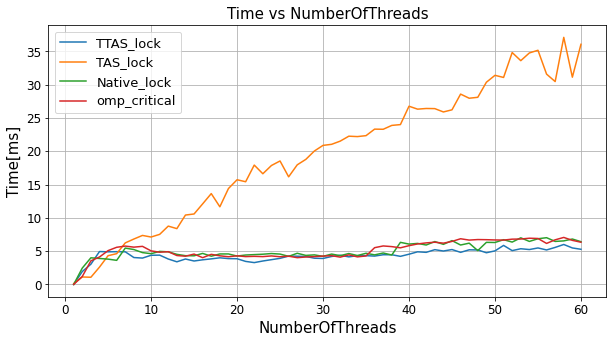

In [5]:
f = 15
plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,label = "TTAS_lock")
plt.plot(df_TAS_lock.NumberOfThreads,df_TAS_lock.RunTime,label = "TAS_lock")
plt.plot(df_Native_lock.NumberOfThreads,df_Native_lock.RunTime,label = "Native_lock")
plt.plot(df_omp_critical.NumberOfThreads,df_omp_critical.RunTime,label = "omp_critical")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Time[ms]", fontsize =f)
plt.title("Time vs NumberOfThreads", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Time vs NumberOfThreads baselocks")

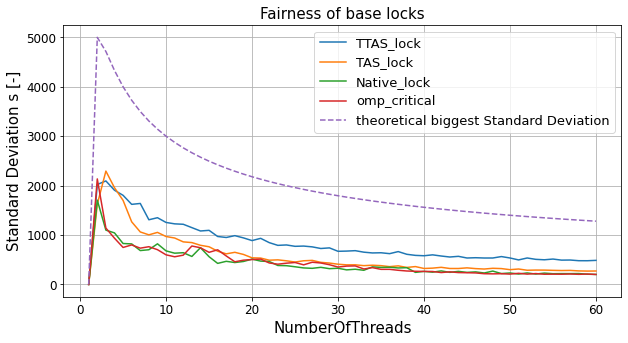

In [6]:
f = 15
iterations = 10000
numberT = np.arange(1,61)
maxDev = np.ones(60)
for i in numberT:
    mean = iterations/i
    maximum = ((iterations-mean)*(iterations-mean)+(i-1)*mean*mean)/i
    maxDev[i-1] = np.sqrt(maximum)
    

plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.HowFair,label = "TTAS_lock")
plt.plot(df_TAS_lock.NumberOfThreads,df_TAS_lock.HowFair,label = "TAS_lock")
plt.plot(df_Native_lock.NumberOfThreads,df_Native_lock.HowFair,label = "Native_lock")
plt.plot(df_omp_critical.NumberOfThreads,df_omp_critical.HowFair,label = "omp_critical")
plt.plot(numberT,maxDev,'--',label="theoretical biggest Standard Deviation")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Standard Deviation s [-]", fontsize =f)
plt.title("Fairness of base locks", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Fairness of baselocks")

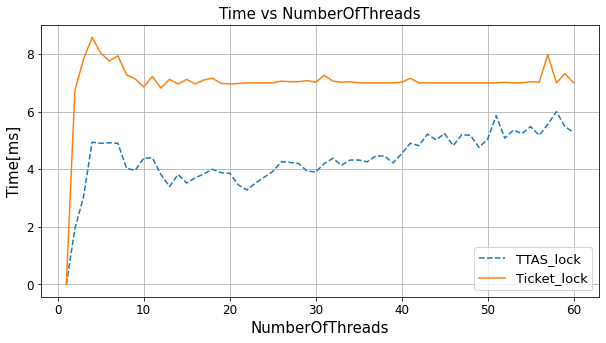

In [7]:
f = 15
plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,'--',label = "TTAS_lock")
plt.plot(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.RunTime,label = "Ticket_lock")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Time[ms]", fontsize =f)
plt.title("Time vs NumberOfThreads", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Time vs NumberOfThreads Ticket lock")

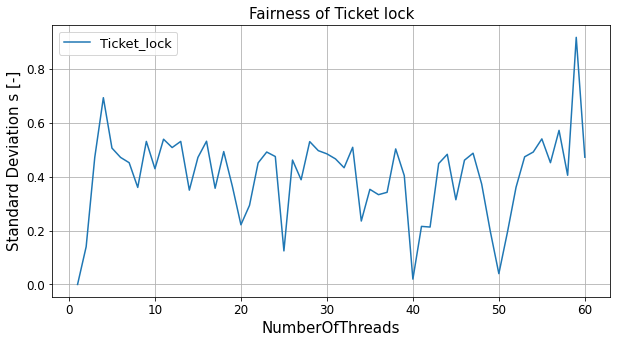

In [8]:
f = 15
plt.plot(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.HowFair,label = "Ticket_lock")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Standard Deviation s [-]", fontsize =f)
plt.title("Fairness of Ticket lock", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Fairness of Ticket lock")

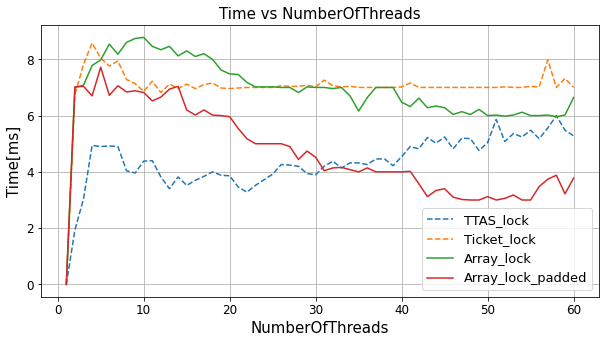

In [9]:
f = 15
plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,'--',label = "TTAS_lock")
plt.plot(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.RunTime,'--',label = "Ticket_lock")
plt.plot(df_Array_lock.NumberOfThreads,df_Array_lock.RunTime,label = "Array_lock")
plt.plot(df_Array_lock_padded.NumberOfThreads,df_Array_lock_padded.RunTime,label = "Array_lock_padded")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Time[ms]", fontsize =f)
plt.title("Time vs NumberOfThreads", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Time vs NumberOfThreads Array lock")

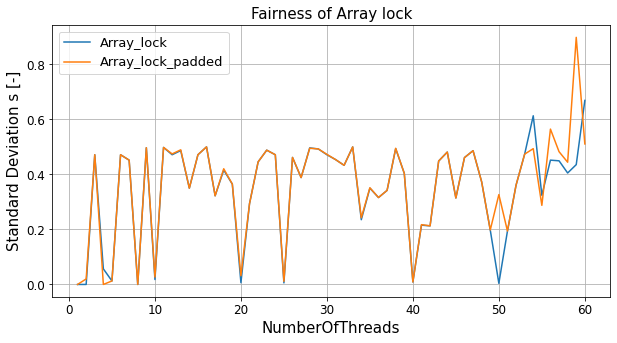

In [10]:
f = 15
plt.plot(df_Array_lock.NumberOfThreads,df_Array_lock.HowFair,label = "Array_lock")
plt.plot(df_Array_lock_padded.NumberOfThreads,df_Array_lock_padded.HowFair,label = "Array_lock_padded")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Standard Deviation s [-]", fontsize =f)
plt.title("Fairness of Array lock", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Fairness of Array lock")

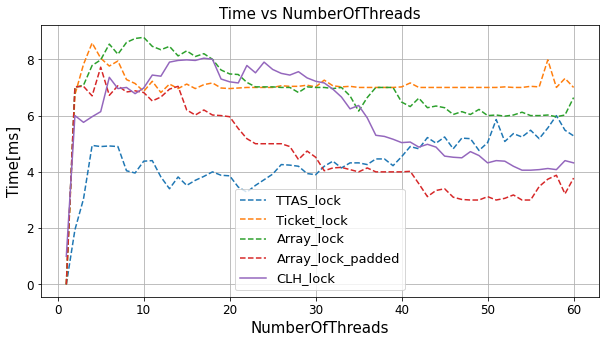

In [11]:
# CLH Lock
f = 15
plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,'--',label = "TTAS_lock")
plt.plot(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.RunTime,'--',label = "Ticket_lock")
plt.plot(df_Array_lock.NumberOfThreads,df_Array_lock.RunTime,'--',label = "Array_lock")
plt.plot(df_Array_lock_padded.NumberOfThreads,df_Array_lock_padded.RunTime,'--',label = "Array_lock_padded")
plt.plot(df_CLH_lock.NumberOfThreads,df_CLH_lock.RunTime,label = "CLH_lock")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Time[ms]", fontsize =f)
plt.title("Time vs NumberOfThreads", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Time vs NumberOfThreads CLH lock")

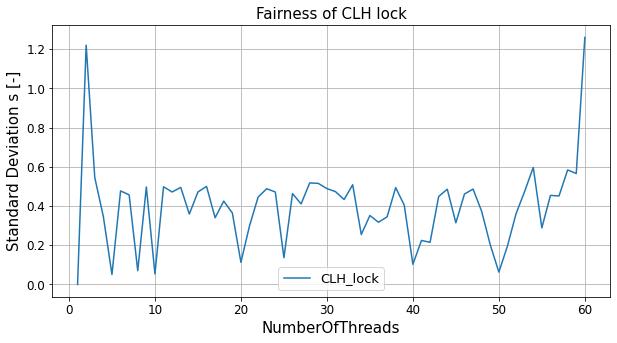

In [12]:
f = 15
plt.plot(df_CLH_lock.NumberOfThreads,df_CLH_lock.HowFair,label = "CLH_lock")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Standard Deviation s [-]", fontsize =f)
plt.title("Fairness of CLH lock", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Fairness of CLH lock")

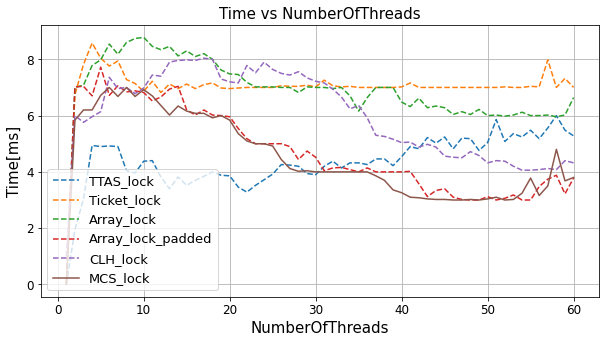

In [13]:
# MSC Lock
f = 15
plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,'--',label = "TTAS_lock")
plt.plot(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.RunTime,'--',label = "Ticket_lock")
plt.plot(df_Array_lock.NumberOfThreads,df_Array_lock.RunTime,'--',label = "Array_lock")
plt.plot(df_Array_lock_padded.NumberOfThreads,df_Array_lock_padded.RunTime,'--',label = "Array_lock_padded")
plt.plot(df_CLH_lock.NumberOfThreads,df_CLH_lock.RunTime,'--',label = "CLH_lock")
plt.plot(df_MSC_lock.NumberOfThreads,df_MSC_lock.RunTime,label = "MCS_lock")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Time[ms]", fontsize =f)
plt.title("Time vs NumberOfThreads", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Time vs NumberOfThreads MCS lock")

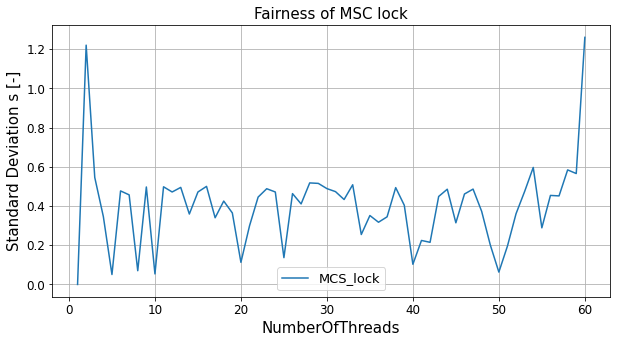

In [14]:
f = 15
plt.plot(df_CLH_lock.NumberOfThreads,df_CLH_lock.HowFair,label = "MCS_lock")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Standard Deviation s [-]", fontsize =f)
plt.title("Fairness of MSC lock", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Fairness of MCS lock")

<ErrorbarContainer object of 3 artists>

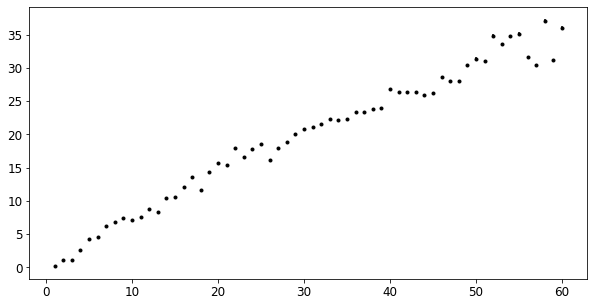

In [15]:
plt.errorbar(df_TAS_lock.NumberOfThreads, df_TAS_lock.RunTime, yerr=df_TAS_lock.Timevar, fmt='.k')

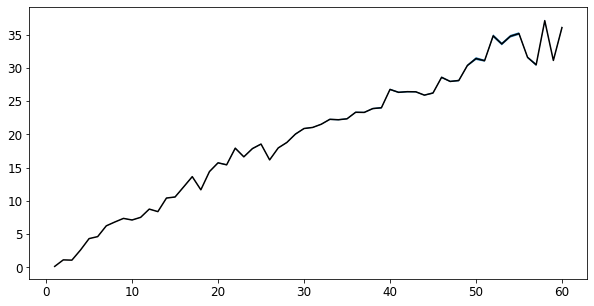

In [16]:
plt.plot(df_TAS_lock.NumberOfThreads, df_TAS_lock.RunTime, 'k-')
plt.fill_between(df_TAS_lock.NumberOfThreads, df_TAS_lock.RunTime-df_TAS_lock.Timevar, df_TAS_lock.RunTime+df_TAS_lock.Timevar)

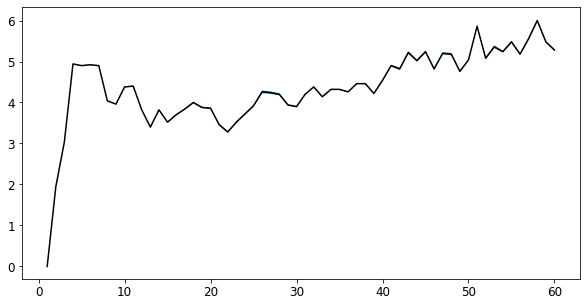

In [17]:
plt.plot(df_TTAS_lock.NumberOfThreads, df_TTAS_lock.RunTime, 'k-')
plt.fill_between(df_TTAS_lock.NumberOfThreads, df_TTAS_lock.RunTime-df_TTAS_lock.Timevar, df_TTAS_lock.RunTime+df_TTAS_lock.Timevar)

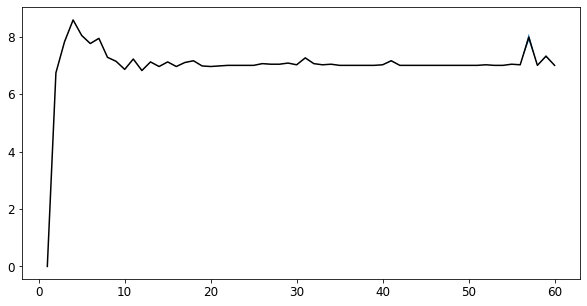

In [18]:
plt.plot(df_Ticket_lock.NumberOfThreads, df_Ticket_lock.RunTime, 'k-')
plt.fill_between(df_Ticket_lock.NumberOfThreads, df_Ticket_lock.RunTime-df_Ticket_lock.Timevar, df_Ticket_lock.RunTime+df_Ticket_lock.Timevar)

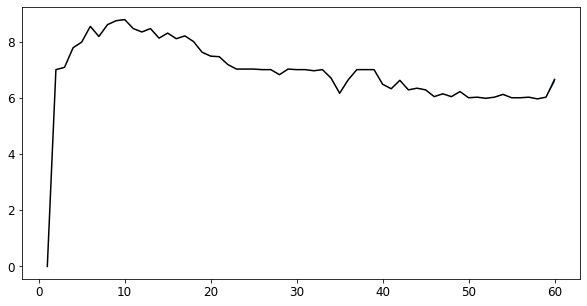

In [19]:
plt.plot(df_Array_lock.NumberOfThreads, df_Array_lock.RunTime, 'k-')
plt.fill_between(df_Array_lock.NumberOfThreads, df_Array_lock.RunTime-df_Array_lock.Timevar, df_Array_lock.RunTime+df_Array_lock.Timevar)

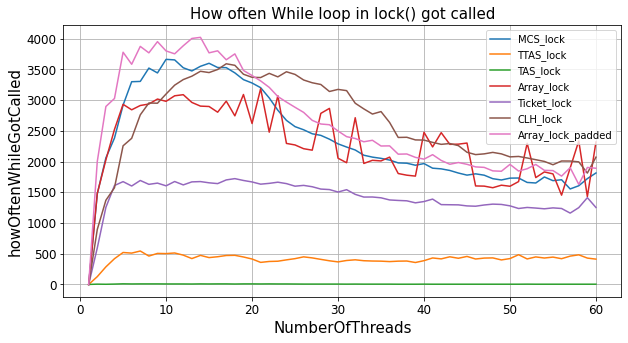

In [20]:
f = 15
plt.plot(df_MSC_lock.NumberOfThreads,df_MSC_lock.HowOftenWhile,label = "MCS_lock")
plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.HowOftenWhile,label = "TTAS_lock")
plt.plot(df_TAS_lock.NumberOfThreads,df_TAS_lock.HowOftenWhile,label = "TAS_lock")
plt.plot(df_Array_lock.NumberOfThreads,df_Array_lock.HowOftenWhile,label = "Array_lock")
plt.plot(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.HowOftenWhile,label = "Ticket_lock")
plt.plot(df_CLH_lock.NumberOfThreads,df_CLH_lock.HowOftenWhile,label = "CLH_lock")
plt.plot(df_Array_lock_padded.NumberOfThreads,df_Array_lock_padded.HowOftenWhile,label = "Array_lock_padded")
#plt.semilogy(df_Native_lock.NumberOfThreads,df_Native_lock.HowOftenWhile,label = "Native_lock")
#plt.semilogy(df_omp_critical.NumberOfThreads,df_omp_critical.HowOftenWhile,label = "omp_critical")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("NumberOfThreads",fontsize=f)
plt.ylabel("howOftenWhileGotCalled",fontsize=f)
plt.title("How often While loop in lock() got called",fontsize=f)
plt.grid()
plt.legend()
plt.savefig("How often While loop in lock() got called")